# Effects of Loan Characteristics on Borrower's APR
## by Xiangbo Wang

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term,employment status.

## Dataset Overview

The dataset consisted of borrower APRs and attributes of 113,937 loans. There are totally 81 attributes included in the original data set. The main focus on this project is to find out the some of the interested attributes that could potentially affect borrower's APR. This include original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as borrower's employment status. Since some of the attributes only avaliable afer July 2009, some old loans are removed from original data set. This gives us totally 84,853 loans that relevant to this project.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#create a new series by changing'ListingCreatingDate' columns to Datetime Dtype
loan['creation_date'] =pd.to_datetime(loan['ListingCreationDate']) 
# prepare a new dataframe that has all the rows after 2009-07-01 because data prior to 2009-07-01 is not relevant to out analysis
loan = loan[loan['creation_date']> '2009-07-01']
#creating a dataframe that contains all the needed columns and drop all other columns
cols = ['LoanOriginalAmount','Term','BorrowerAPR','StatedMonthlyIncome','ProsperRating (Alpha)','EmploymentStatus']
loan_clean = loan[cols] 
#creating an order for Prosper Rating
list_sorted = ['AA', 'A', 'B','C','D','E','HR']
loan_clean['ProsperRating (Alpha)'] = loan_clean['ProsperRating (Alpha)'].astype('category').cat.set_categories(list_sorted)
# sort the values by the created list
loan_clean.sort_values(by=['ProsperRating (Alpha)'],inplace = True)
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 6725 to 67417
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   LoanOriginalAmount     84853 non-null  int64   
 1   Term                   84853 non-null  int64   
 2   BorrowerAPR            84853 non-null  float64 
 3   StatedMonthlyIncome    84853 non-null  float64 
 4   ProsperRating (Alpha)  84853 non-null  category
 5   EmploymentStatus       84853 non-null  object  
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 4.0+ MB


## Distribution of Borrower APR

The distribution of borrower APR shows most of the loans falls between APR rate 0.15 to 0.3, howerver there are around 7500 loans has rates from 0.35 and 0.36. 

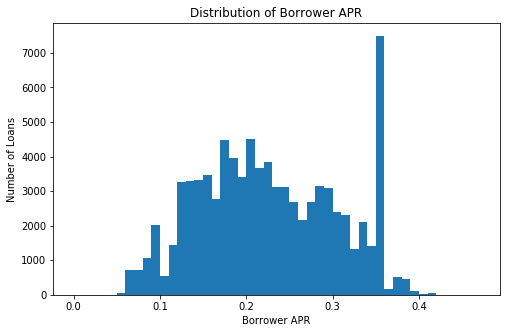

In [4]:
bins = np.arange(0, loan_clean.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Number of Loans')
plt.title('Distribution of Borrower APR');

## Distribution of other categories variables in the dataset: Term,ProsperRating and EmploymentStatus

we can see that most loan terms fall under 36 months, most loan ratings are from grade A to C. Most borrowers have employment status as employed.

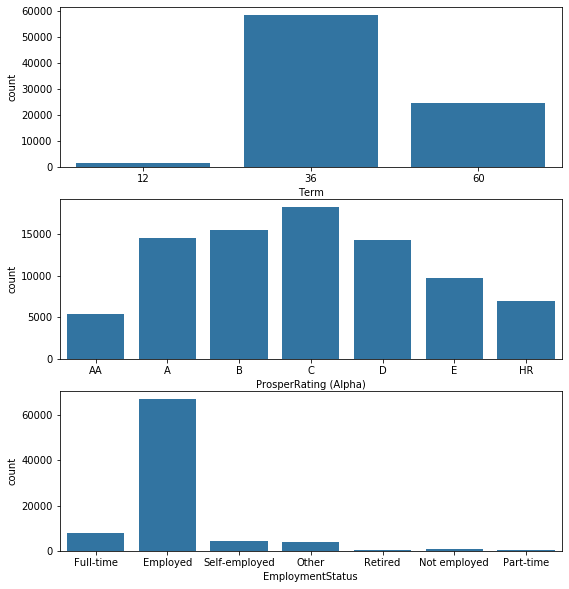

In [5]:
fig, ax = plt.subplots(nrows=3, figsize = [9,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_clean, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_clean, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan_clean, x = 'EmploymentStatus', color = default_color, ax = ax[2])

plt.show()

## Correlations between numerical values and categorical values

The Correlation Coefficient of borrower APR and Loan Original Amount is -0.426 which can be interpreted as low negative correlation. This means the more loan amount is, the lower the APR.However the relationship is not very strong. It is also interesting to see that the Correlation Coefficient between borrower APR and stated monthly income is -0.094. Which means that people normally believe the more monthly income stated can lower the APR but in fact it does not affect too much

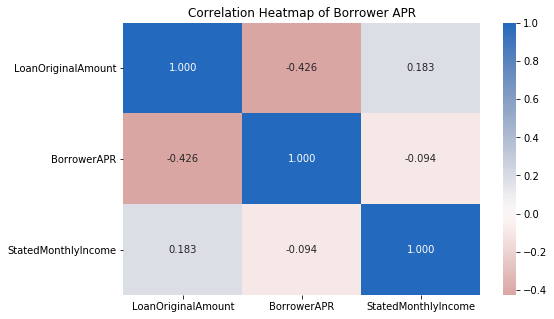

In [6]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
# correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(loan_clean[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap of Borrower APR');
plt.show()

## Borrower APR across Rating and Status

From Grade AA to Grade C, the APR rate for Not employed is slightly higher than the rest of the employment status. When prosper rating drops from Grade D to Grade HR, there is hardly difference can be found with APR rate among employment status.So we can see that Prosper Rating Grade has stronger affect on APR than employ status. 

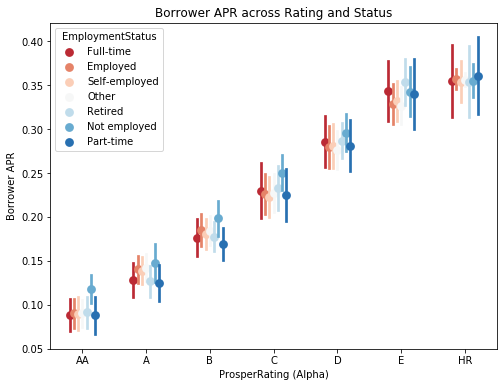

In [7]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_clean, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'RdBu', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Rating and Status')
plt.ylabel('Borrower APR');

## Loan Original Amount across Status and Term

When loan terms is larger, the loan original amount is larger. However, it is hardly to find any big changes on loan original amount across employment status. So we can say that terms has bigger affect on loan original amount than employment status.


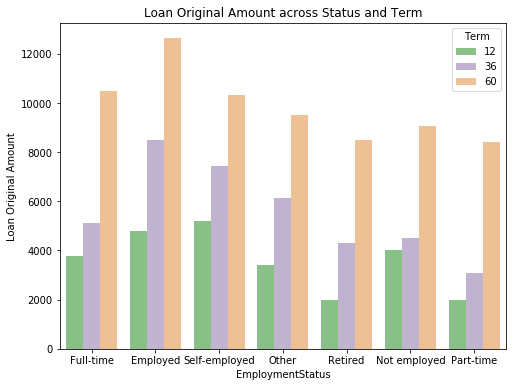

In [8]:
fig = plt.figure(figsize = [8,6])
ax = sb.barplot(data = loan_clean, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Accent', dodge = 0.4, ci= None)
plt.title('Loan Original Amount across Status and Term')
plt.ylabel('Loan Original Amount')
ax.set_yticklabels([],minor = True);